## Shallow network regions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def number_regions(Di, D):
    # Zaslavsky's formula for the number of regions
    N = 0
    for i in range(1, Di + 1):
        N += math.comb(D, i)
    return N+1 #We add 1 to account for the unbounded region

In [3]:
# Calculate the number of regions for 2D input (Di=2) and 3 hidden units (D=3) as in figure 3.8j
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

# Calculate the number of regions for 10D input (Di=10) and 50 hidden units (D=50)
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=2, D=3, Number of regions = 7, True value = 7
Di=10, D=50, Number of regions = 13432735556, True value = 13432735556


In [4]:
# Depending on how you implemented it, the calculation may fail when (not to worry...)
try:
  N = number_regions(10, 8)
  print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
    print("An exception occurred:", error)

Di=10, D=8, Number of regions = 256, True value = 256


In [5]:
# Let's do the calculation properly when D<Di (see figure 3.10 from the book)
D = 8; Di = 10
N = np.power(2,D)
# We can equivalently do this by calling number_regions with the D twice
# Think about why this works
N2 = number_regions (D,D)
print(f"Di=10, D=8, Number of regions = {int(N)}, Number of regions = {int(N2)}, True value = 256")

Di=10, D=8, Number of regions = 256, Number of regions = 256, True value = 256


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions


Counting regions for 100 input dimensions


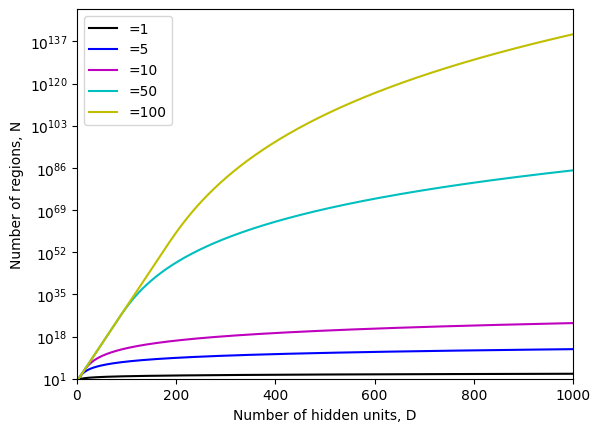

In [6]:
# Now let's plot the graph from figure 3.9a
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(1000):
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['=1', '=5', '=10', '=50', '=100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

In [7]:
# Now let's compute and plot the number of regions as a function of the number of parameters as in figure 3.9b
# First let's write a function that computes the number of parameters as a function of the input dimension and number of hidden units (assuming just one output)

def number_parameters(D_i, D):
  # TODO -- replace this code with the proper calculation
  # input, hidden, output
  # # of weights in input and hidden layer = Di * D
  # # of weights in hidden layer and output layer = D * Do (1 in this case)
  # # of biases in hidden layer = D
  # # of biases in output layer (1 in our case)
  return (D_i*D) + D + D + 1

# Now let's test the code
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 97")

Di=10, D=8, Number of parameters = 97, True value = 97


In [12]:
number_parameters(1, 2)

7

Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


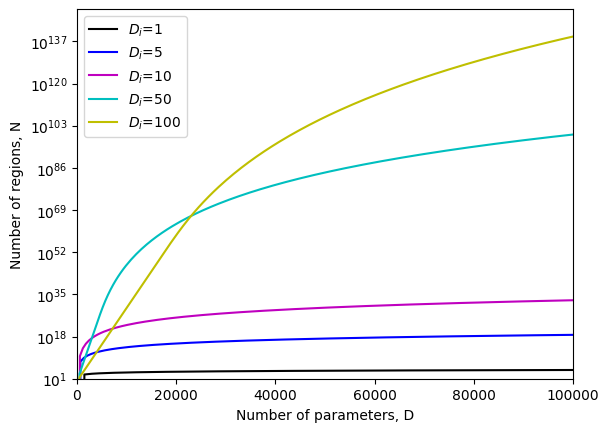

In [9]:
# Now let's plot the graph from figure 3.9a (takes ~1min)
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

# We'll compute the five lines separately this time to make it faster
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for c_hidden in range(1, 200):
        # Iterate over different ranges of number hidden variables for different input sizes
        D = int(c_hidden * 500 / D_i)
        params[c_dim, c_hidden] =  D_i * D +D + D +1
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['$D_i$=1', '$D_i$=5', '$D_i$=10', '$D_i$=50', '$D_i$=100'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()